In [1]:
import numpy as np
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [2]:
data1 = pd.read_csv('kaggle_train_churn.csv', encoding='utf-8', index_col=None, sep = ",")
print(data1.info)

<bound method DataFrame.info of       CustomerID  Count  ...                     Churn Reason Churn Value
0     2995-YWTCD      1  ...                              NaN           0
1     3318-ISQFQ      1  ...                              NaN           0
2     2469-DTSGX      1  ...                              NaN           0
3     8896-BQTTI      1  ...                              NaN           0
4     9565-DJPIB      1  ...              Network reliability           1
...          ...    ...  ...                              ...         ...
5277  8216-AZUUZ      1  ...                              NaN           0
5278  5006-MXVRN      1  ...                              NaN           0
5279  4804-NCPET      1  ...                              NaN           0
5280  2878-DHMIN      1  ...                              NaN           0
5281  7774-OJSXI      1  ...  Poor expertise of phone support           1

[5282 rows x 31 columns]>


In [3]:
data2 = pd.read_csv('kaggle_test_churn.csv', encoding='utf-8', index_col=None, sep = ",")
print(data2.info)

<bound method DataFrame.info of       CustomerID  Count  ...             Payment Method Monthly Charges
0     3638-DIMPH      1  ...           Electronic check           43.80
1     5175-WLYXL      1  ...               Mailed check           78.85
2     7054-DMVAS      1  ...  Bank transfer (automatic)           65.30
3     1767-TGTKO      1  ...           Electronic check           45.45
4     3170-NMYVV      1  ...  Bank transfer (automatic)           20.15
...          ...    ...  ...                        ...             ...
1756  2480-JZOSN      1  ...               Mailed check           20.65
1757  9742-XOKTS      1  ...           Electronic check           89.55
1758  6461-SZMCV      1  ...  Bank transfer (automatic)           87.95
1759  6259-WJQLC      1  ...    Credit card (automatic)           81.10
1760  8999-YPYBV      1  ...               Mailed check           84.35

[1761 rows x 27 columns]>


In [4]:
features = ['CustomerID', 'Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
            'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
            'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 
            'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Churn Value']

In [5]:
for col in features:
  if len(data1[col].unique()) < 10:
    print('column =', col)
    print('unique_val =', data1[col].unique())
    print('len(unique_val) =', len(data1[col].unique()))
    print('')

column = Gender
unique_val = ['Female' 'Male']
len(unique_val) = 2

column = Senior Citizen
unique_val = ['No' 'Yes']
len(unique_val) = 2

column = Partner
unique_val = ['Yes' 'No']
len(unique_val) = 2

column = Dependents
unique_val = ['Yes' 'No']
len(unique_val) = 2

column = Phone Service
unique_val = ['Yes' 'No']
len(unique_val) = 2

column = Multiple Lines
unique_val = ['Yes' 'No' 'No phone service']
len(unique_val) = 3

column = Internet Service
unique_val = ['No' 'Fiber optic' 'DSL']
len(unique_val) = 3

column = Online Security
unique_val = ['No internet service' 'No' 'Yes']
len(unique_val) = 3

column = Online Backup
unique_val = ['No internet service' 'Yes' 'No']
len(unique_val) = 3

column = Device Protection
unique_val = ['No internet service' 'Yes' 'No']
len(unique_val) = 3

column = Tech Support
unique_val = ['No internet service' 'Yes' 'No']
len(unique_val) = 3

column = Streaming TV
unique_val = ['No internet service' 'Yes' 'No']
len(unique_val) = 3

column = Streaming 

In [6]:
def fix_data(data): #train, val and test data

  #gender
  data.loc[data['Gender'] == 'Male', 'Gender'] = 1
  data.loc[data['Gender'] == 'Female', 'Gender'] = 0

  columns_for_fix_with_2_unique = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']
  for column in columns_for_fix_with_2_unique:
    data.loc[data[column] == 'Yes', column] = 1
    data.loc[data[column] == 'No', column] = 0

  columns_for_fix_with_3_unique = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
                                   'Streaming TV', 'Streaming Movies']
  for column in columns_for_fix_with_3_unique:
    data.loc[data[column] == 'Yes', column] = 1
    data.loc[data[column] == 'No internet service', column] = 0
    data.loc[data[column] == 'No', column] = -1

  # Multiple Lines
  data.loc[data['Multiple Lines'] == 'Yes', 'Multiple Lines'] = 1
  data.loc[data['Multiple Lines'] == 'No phone service', 'Multiple Lines'] = 0
  data.loc[data['Multiple Lines'] == 'No', 'Multiple Lines'] = -1

  # Internet Service 
  data.loc[data['Internet Service'] == 'Fiber optic', 'Internet Service'] = 1
  data.loc[data['Internet Service'] == 'No', 'Internet Service'] = 0
  data.loc[data['Internet Service'] == 'DSL', 'Internet Service'] = -1

  # Contract ['Two year' 'Month-to-month' 'One year']
  data.loc[data['Contract'] == 'Two year', 'Contract'] = 1
  data.loc[data['Contract'] == 'One year', 'Contract'] = 0
  data.loc[data['Contract'] == 'Month-to-month', 'Contract'] = -1
  
  # Payment Method ['Bank transfer (automatic)' 'Electronic check' 'Mailed check' 'Credit card (automatic)']
  data.loc[data['Payment Method'] == 'Bank transfer (automatic)', 'Payment Method'] = 0
  data.loc[data['Payment Method'] == 'Electronic check', 'Payment Method'] = 1
  data.loc[data['Payment Method'] == 'Mailed check', 'Payment Method'] = 2
  data.loc[data['Payment Method'] == 'Credit card (automatic)', 'Payment Method'] = 3

  return data

In [7]:
fixed_data = fix_data(data1[features])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [8]:
fixed_data = fixed_data[['CustomerID', 'Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
            'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
            'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 
            'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Churn Value']]

In [9]:
fixed_data.head()

,CustomerID,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value
0,2995-YWTCD,95918,39.292334,-121.320597,0,0,1,1,19,1,1,0,0,0,0,0,0,0,1,1,0,24.90,0
1,3318-ISQFQ,94560,37.504133,-122.032347,0,0,0,0,20,1,-1,0,0,0,0,0,0,0,-1,1,0,19.50,0
2,2469-DTSGX,93066,34.297628,-119.014627,0,1,0,0,72,1,1,1,-1,1,1,1,1,1,1,0,1,111.65,0
3,8896-BQTTI,95614,38.880622,-120.973865,1,0,0,0,1,1,1,0,0,0,0,0,0,0,-1,1,2,25.00,0
4,9565-DJPIB,94590,38.104705,-122.247387,0,0,0,0,4,1,1,1,-1,1,-1,-1,1,-1,-1,0,2,89.60,1


# Data Visualization - Part 1

In [10]:
df1 = fixed_data[['Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
            'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
            'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 
            'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Churn Value']][fixed_data['Churn Value'] == 1]

df2 = fixed_data[['Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
            'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
            'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 
            'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Churn Value']][fixed_data['Churn Value'] == 0]
df1_weighted = pd.concat([df1, df1, df1])
print('churn_value = 1: ', df1.shape)
print('churn_value = 0: ', df2.shape)

churn_value = 1:  (1370, 22)
churn_value = 0:  (3912, 22)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


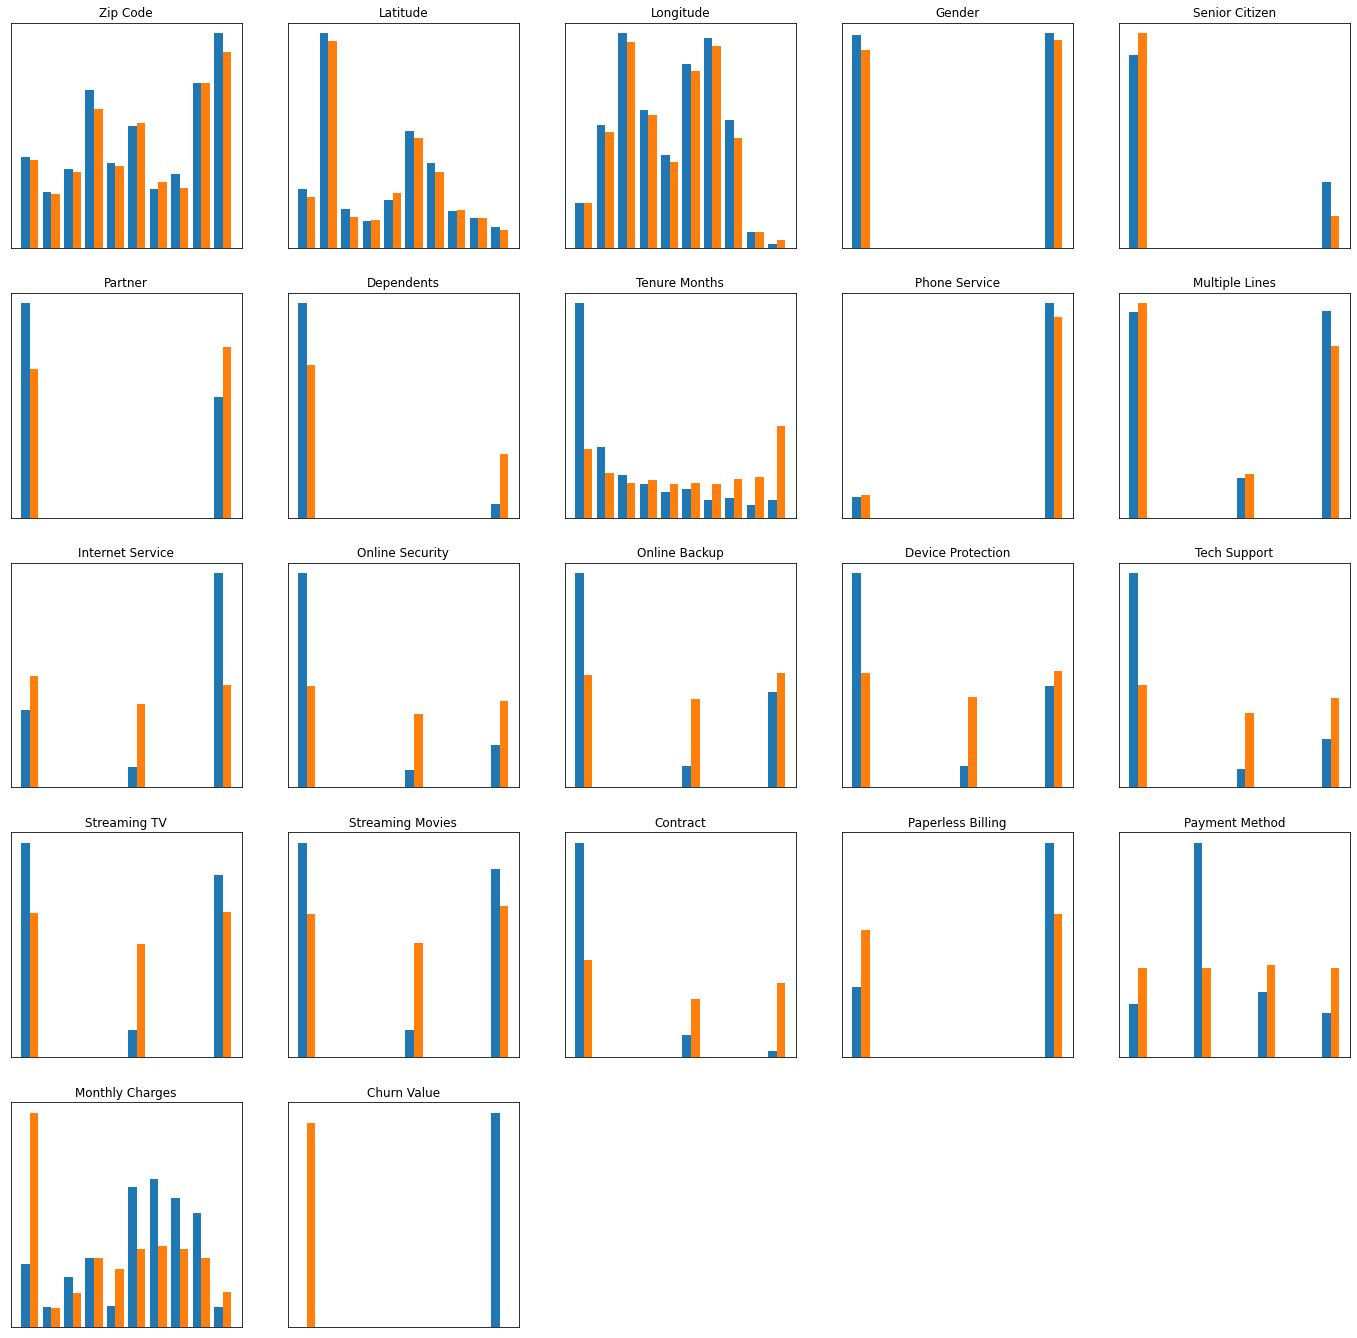

In [11]:
fig = plt.figure(figsize=(24,24))
i=0
ax = []
for col in df1.columns:
  i+=1
  ax.append(fig.add_subplot(5, 5, i))
  ax

i=0
for col in df1.columns:
  i+=1
  ax[i-1].set(title = col, xticks=[], yticks=[])
  n, bins, patches = ax[i-1].hist([df1_weighted[[col]], df2[[col]]], label = col)

plt.show()

Из графиков распределений видно, что есть признаки, по которым тяжело сказать уйдет ли клиент в зависимости от значения этого признака или нет
А есть достаточно информативные признаки:


Если Senior_sitizen = True, то с вероятностью примерно 2\3 человек уйдет

Если Partner = False, то с вероятностью примерно 3\5 человек уйдет
Аналогично для Dependents

Если Tenure Month = 0, то с ероятностью 3\4 человек уйдет

Если Internet service = Fiber optic, то с ероятностью 4\5 человек уйдет

Если Online security = No internet service, то с ероятностью 2\3 человек уйдет

Аналогично для Online Backup = No

Аналогично для Device protection = No

Аналогично для Tech Support = No

Если Streaming tv != No internet service то вероятность, что человек уйдет больше 0.5

Аналогично для streaming movies

Если Contract = Month-to-month, то с ероятностью 2\3 человек уйдет

Если paperless billing = yes, то с ероятностью больше 0.5 человек уйдет

Если payment method = Electronic check, то с ероятностью 3\4  человек уйдет

# Data Visualization - Part 2

In [12]:
from scipy import stats

my_mode = lambda x: stats.mode(x)[0][0]

# only for churn_score
mean_4_most_frequent = lambda x: np.mean(x.value_counts().nlargest(4).index)

#only for churn_value
diff = lambda x: 2*x.sum() - x.count()

diff_min_max = lambda x : x.max() - x.min()

# number of individuals or items moving out
def churn_rate(x):
    return x.count() * x.mean()

In [13]:
df = pd.read_csv('kaggle_train_churn.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,customerid,count,country,state,city,zip_code,lat_long,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn_score,cltv,churn_reason,churn_value
0,2995-YWTCD,1,United States,California,Browns Valley,95918,"39.292334, -121.320597",39.292334,-121.320597,Female,No,Yes,Yes,19,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.90,79,5396,NaN,0
1,3318-ISQFQ,1,United States,California,Newark,94560,"37.504133, -122.032347",37.504133,-122.032347,Female,No,No,No,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),19.50,28,5409,NaN,0
2,2469-DTSGX,1,United States,California,Somis,93066,"34.297628, -119.014627",34.297628,-119.014627,Female,Yes,No,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,111.65,75,5388,NaN,0
3,8896-BQTTI,1,United States,California,Cool,95614,"38.880622, -120.973865",38.880622,-120.973865,Male,No,No,No,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,25.00,53,2371,NaN,0
4,9565-DJPIB,1,United States,California,Vallejo,94590,"38.104705, -122.247387",38.104705,-122.247387,Female,No,No,No,4,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,No,Mailed check,89.60,87,4689,Network reliability,1


In [14]:
df['internet_type'] = df['internet_service'].copy()
df['internet_service'] = df['internet_type'].apply(lambda x: 'Yes' if x != 'No' else 'No')

drop_cols = [
    'customerid',
    'count',
    'country', 
    'state',
    'city',
    'zip_code',
    'lat_long', 
    'latitude',
    'longitude',
    'cltv',
]

y = df['churn_value'].copy()
X = df.drop(drop_cols, axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bin_tm = pd.cut(X_train['tenure_months'], np.linspace(0, 100, 11).tolist() + [np.inf]).rename('bin_tm')
bin_mc = pd.cut(X_train['monthly_charges'], np.linspace(0, 150, 11).tolist() + [np.inf]).rename('bin_mc')

X_train = X_train.join([bin_tm, bin_mc])

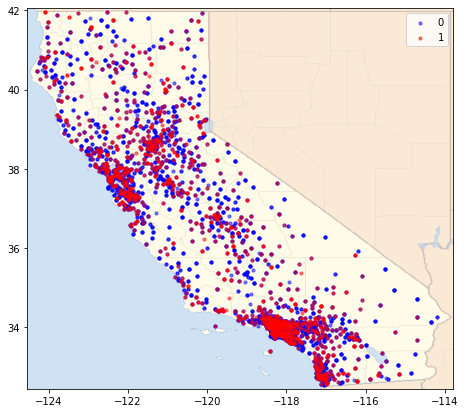

In [15]:
import matplotlib.image as mpimg
import matplotlib
california_img=mpimg.imread('/content/california.png')

cdict = {1: 'red', 0: 'blue'}

fig, ax = plt.subplots(figsize=(10,7))
for g in [0, 1]:
    i = np.where(df['churn_value'] == g)[0]
    ax.scatter(df['longitude'][i], df['latitude'][i], label=g, c=cdict[g], alpha=0.5, s=10)
ax.legend()
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.show()

In [16]:
def add_serv_count(X):
    
    serv_cols = [
    'phone_service',
    'multiple_lines',
    'internet_service',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies'
    ]
    
    serv_count = np.zeros(shape=(X.shape[0],), dtype=int)
    for col in serv_cols:
        serv_count += (X[col] == 'Yes').astype(int).values

    X['service_count'] = serv_count

def transform_yes_no(X):
    
    change_cols = [
    'multiple_lines',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies'
    ]
    
    for col in change_cols:
        X[col] = X[col].str.replace(r"No.*", 'No')

def before_encoding(X):
    X['total_charges'] = X['tenure_months'] * X['monthly_charges']
    add_serv_count(X)
    transform_yes_no(X)

In [17]:
before_encoding(X_train)
before_encoding(X_test)

In [18]:
cat_cols = X_train.loc[:, X_train.dtypes == 'object'].columns
num_cols = X_train.loc[:, X_train.dtypes != 'object'].columns

In [19]:
cat_cols

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'churn_reason', 'internet_type'],
      dtype='object')

In [20]:
num_cols

Index(['tenure_months', 'monthly_charges', 'churn_score', 'churn_value',
       'bin_tm', 'bin_mc', 'total_charges', 'service_count'],
      dtype='object')

In [21]:
X_train.head()

,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn_score,churn_reason,churn_value,internet_type,bin_tm,bin_mc,total_charges,service_count
4447,Female,No,Yes,Yes,72,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Two year,Yes,Bank transfer (automatic),71.45,30,NaN,0,DSL,"(70.0, 80.0]","(60.0, 75.0]",5144.40,6
4899,Male,No,No,No,1,Yes,Yes,Yes,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,54.35,87,Attitude of service provider,1,DSL,"(0.0, 10.0]","(45.0, 60.0]",54.35,4
3029,Male,No,Yes,No,1,Yes,No,Yes,Yes,No,Yes,No,No,No,Month-to-month,No,Mailed check,55.70,36,NaN,0,DSL,"(0.0, 10.0]","(45.0, 60.0]",55.70,4
755,Female,No,Yes,No,60,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),59.85,37,NaN,0,DSL,"(50.0, 60.0]","(45.0, 60.0]",3591.00,6
518,Female,Yes,No,No,38,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.20,71,NaN,0,No,"(30.0, 40.0]","(15.0, 30.0]",767.60,1


In [22]:
all_cat_cols = X_train.loc[:, X_train.dtypes == 'object'].columns
all_cat_cols

interesting_cols = [
    'gender',
    'partner',
    'dependents',
    'tenure_months',
    'internet_service',
    'contract', 
    'payment_method',
    'service_count',
    'paperless_billing'
]

In [23]:
int_mean_dict = {}
all_cat_mean_dict = {}

def get_agg(X, cols, mean_dict):
    for col in cols:
        mean_dict[col] = X.groupby(col).churn_value.agg('mean')
        print(X.groupby(col).churn_value.agg('mean'))
        print('\n')

In [24]:
get_agg(X_train, interesting_cols, int_mean_dict)

gender
Female    0.265753
Male      0.253739
Name: churn_value, dtype: float64


partner
No     0.329474
Yes    0.185865
Name: churn_value, dtype: float64


dependents
No     0.323268
Yes    0.056689
Name: churn_value, dtype: float64


tenure_months
0     0.000000
1     0.628834
2     0.509804
3     0.460784
4     0.546512
        ...   
68    0.056604
69    0.060000
70    0.067797
71    0.036145
72    0.029412
Name: churn_value, Length: 73, dtype: float64


internet_service
No     0.079614
Yes    0.311715
Name: churn_value, dtype: float64


contract
Month-to-month    0.423193
One year          0.115044
Two year          0.028446
Name: churn_value, dtype: float64


payment_method
Bank transfer (automatic)    0.169231
Credit card (automatic)      0.152010
Electronic check             0.439734
Mailed check                 0.195780
Name: churn_value, dtype: float64


service_count
1    0.108696
2    0.317460
3    0.426606
4    0.344828
5    0.320594
6    0.267894
7    0.223433
8    0.0995

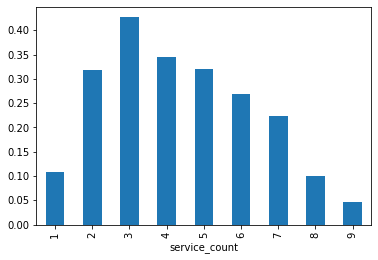

In [25]:
X_train.groupby('service_count').churn_value.agg('mean').plot.bar()

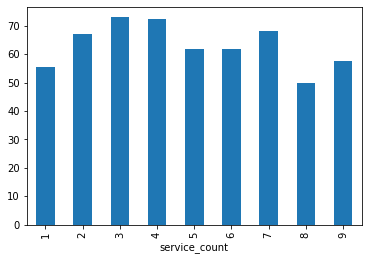

In [26]:
X_train.groupby('service_count').churn_score.agg(mean_4_most_frequent).plot.bar()

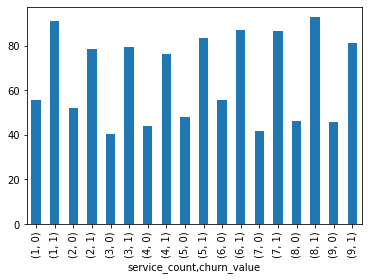

In [27]:
X_train.groupby(['service_count', 'churn_value']).churn_score.agg(mean_4_most_frequent).plot.bar()

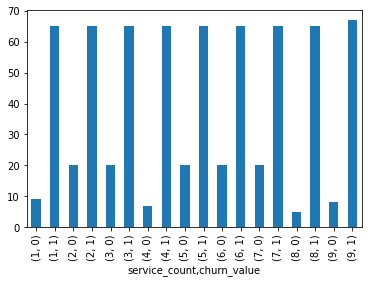

In [28]:
X_train.groupby(['service_count', 'churn_value']).churn_score.agg('min').plot.bar()

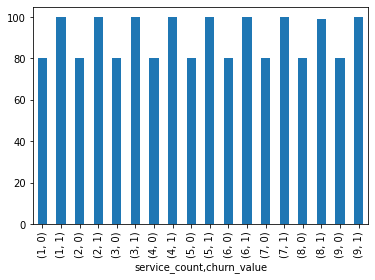

In [29]:
X_train.groupby(['service_count', 'churn_value']).churn_score.agg('max').plot.bar()

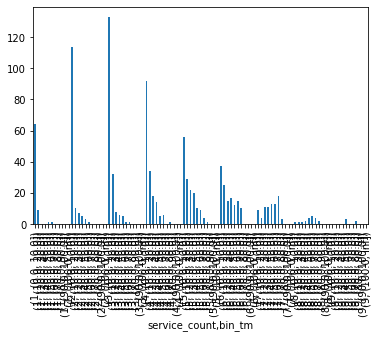

In [30]:
X_train.groupby(['service_count', 'bin_tm']).churn_value.agg(churn_rate).plot.bar()

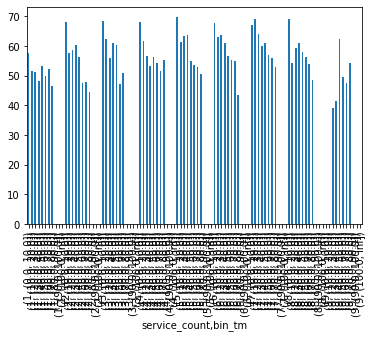

In [31]:
X_train.groupby(['service_count', 'bin_tm']).churn_score.agg('mean').plot.bar()

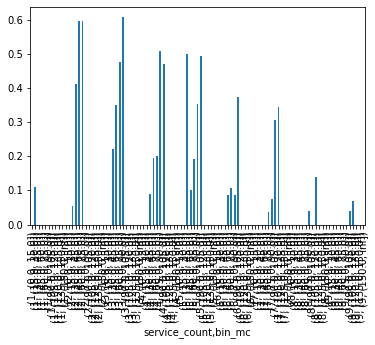

In [32]:
X_train.groupby(['service_count', 'bin_mc']).churn_value.agg('mean').plot.bar()

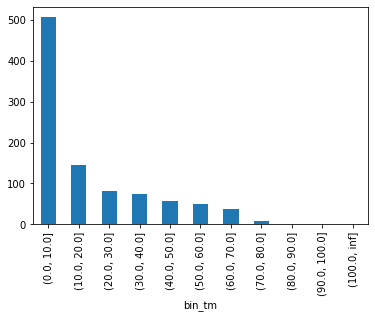

In [33]:
X_train.groupby('bin_tm').churn_value.agg(churn_rate).plot.bar()

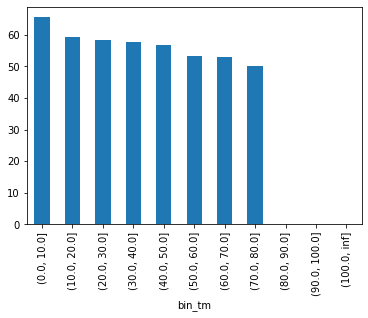

In [34]:
X_train.groupby('bin_tm').churn_score.agg('mean').plot.bar()

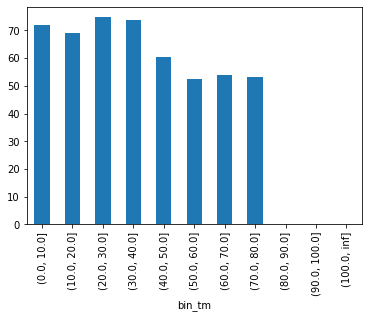

In [35]:
X_train.groupby('bin_tm').churn_score.agg(mean_4_most_frequent).plot.bar()

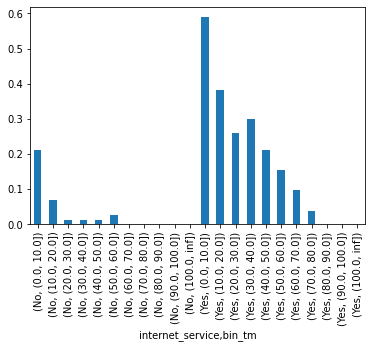

In [36]:
X_train.groupby(['internet_service', 'bin_tm']).churn_value.agg('mean').plot.bar()

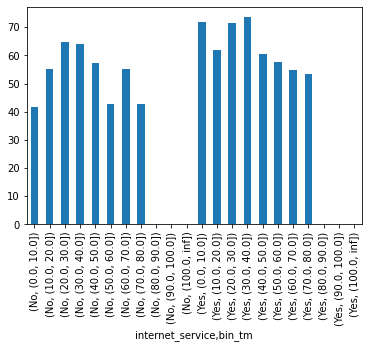

In [37]:
X_train.groupby(['internet_service', 'bin_tm']).churn_score.agg(mean_4_most_frequent).plot.bar()

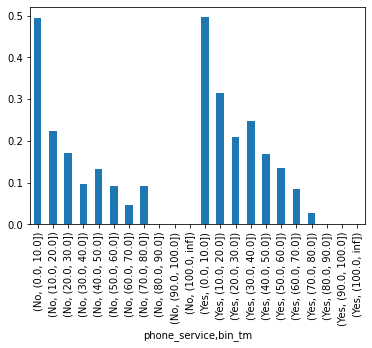

In [38]:
X_train.groupby(['phone_service', 'bin_tm']).churn_value.agg('mean').plot.bar()

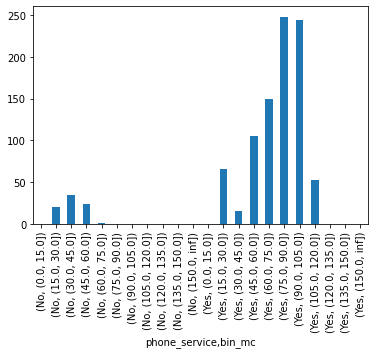

In [39]:
X_train.groupby(['phone_service', 'bin_mc']).churn_value.agg(churn_rate).plot.bar()

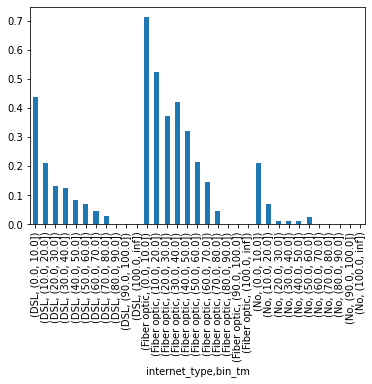

In [40]:
X_train.groupby(['internet_type', 'bin_tm']).churn_value.agg('mean').plot.bar()

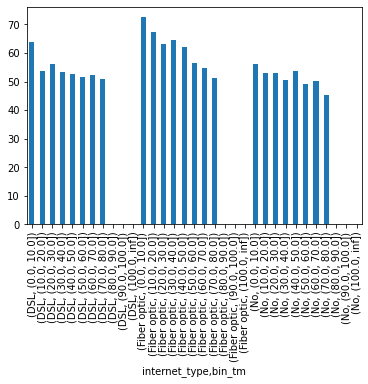

In [41]:
X_train.groupby(['internet_type', 'bin_tm']).churn_score.agg('mean').plot.bar()

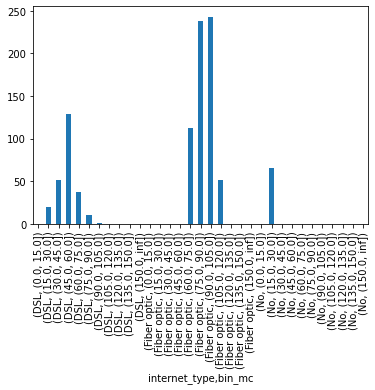

In [42]:
X_train.groupby(['internet_type', 'bin_mc']).churn_value.agg(churn_rate).plot.bar()

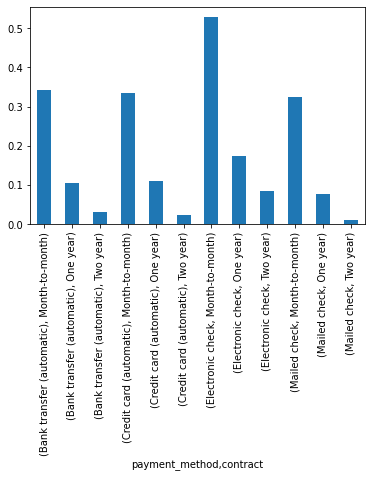

In [43]:
X_train.groupby(['payment_method', 'contract']).churn_value.agg('mean').plot.bar()

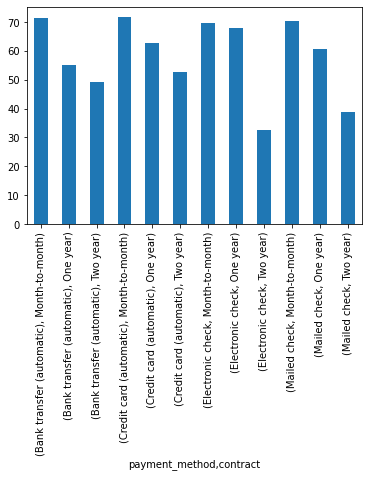

In [44]:
X_train.groupby(['payment_method', 'contract']).churn_score.agg(mean_4_most_frequent).plot.bar()

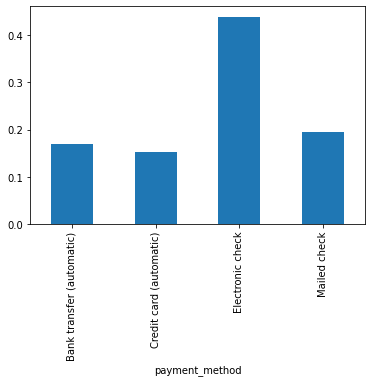

In [45]:
X_train.groupby(['payment_method']).churn_value.agg('mean').plot.bar()

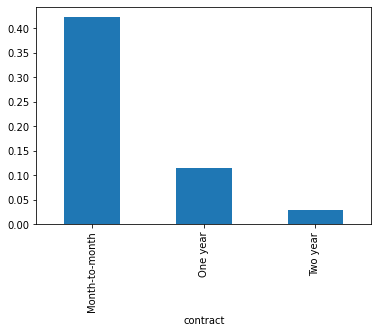

In [46]:
X_train.groupby(['contract']).churn_value.agg('mean').plot.bar()

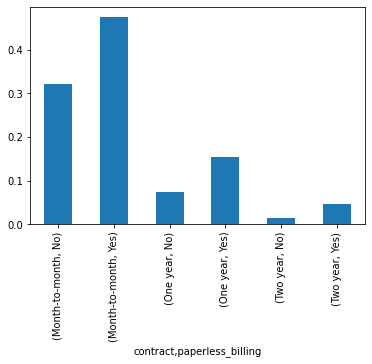

In [47]:
X_train.groupby(['contract', 'paperless_billing']).churn_value.agg('mean').plot.bar()

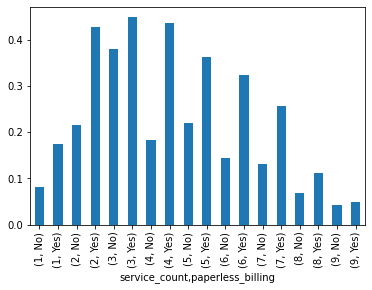

In [48]:
X_train.groupby(['service_count', 'paperless_billing']).churn_value.agg('mean').plot.bar()

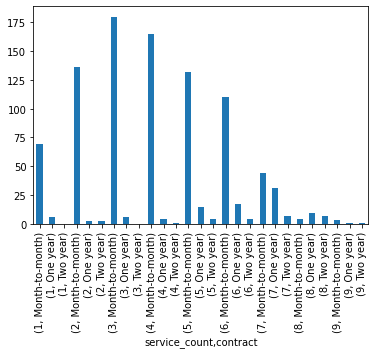

In [49]:
X_train.groupby(['service_count', 'contract']).churn_value.agg(churn_rate).plot.bar()

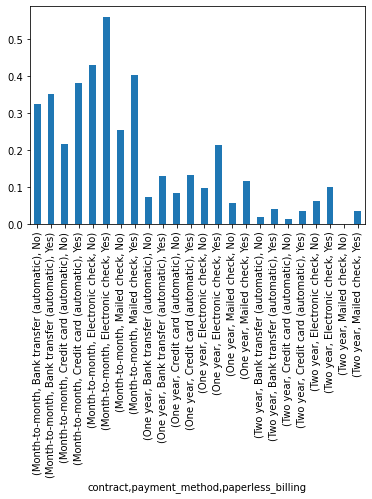

In [50]:
X_train.groupby(['contract', 'payment_method', 'paperless_billing']).churn_value.agg('mean').plot.bar()

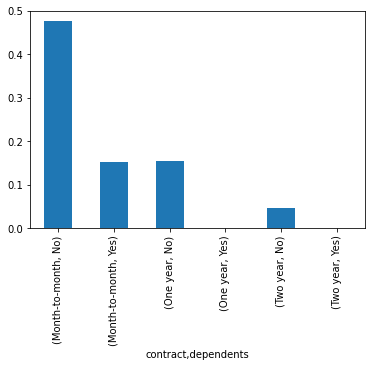

In [51]:
X_train.groupby(['contract', 'dependents']).churn_value.agg('mean').plot.bar()

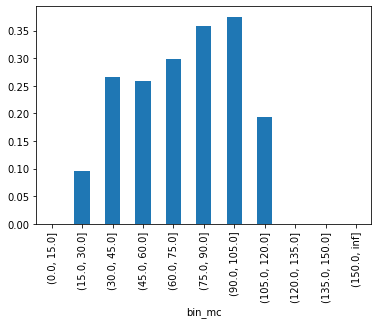

In [52]:
X_train.groupby('bin_mc').churn_value.agg('mean').plot.bar()

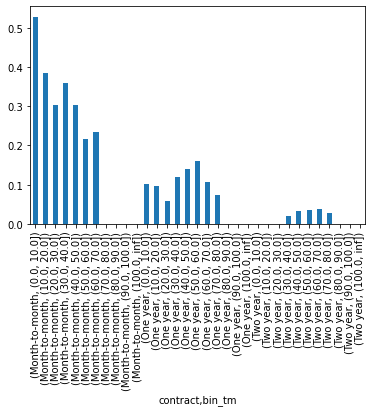

In [53]:
X_train.groupby(['contract', 'bin_tm']).churn_value.agg('mean').plot.bar()

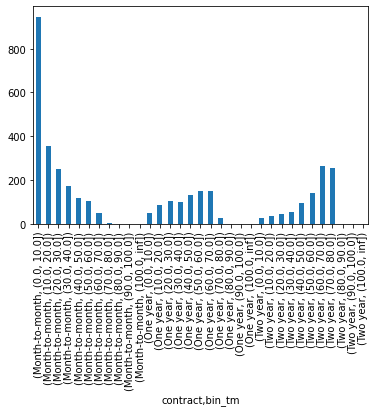

In [54]:
X_train.groupby(['contract', 'bin_tm']).churn_value.agg('count').plot.bar()

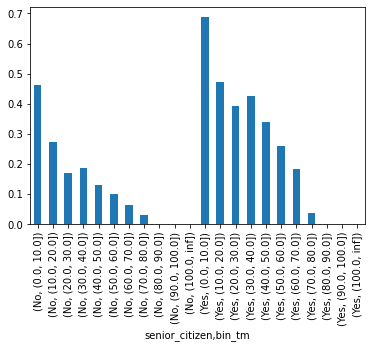

In [55]:
X_train.groupby(['senior_citizen', 'bin_tm']).churn_value.agg('mean').plot.bar()

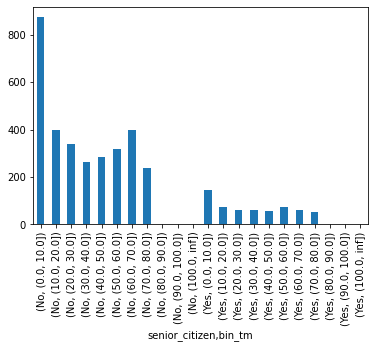

In [56]:
X_train.groupby(['senior_citizen', 'bin_tm']).churn_value.agg('count').plot.bar()

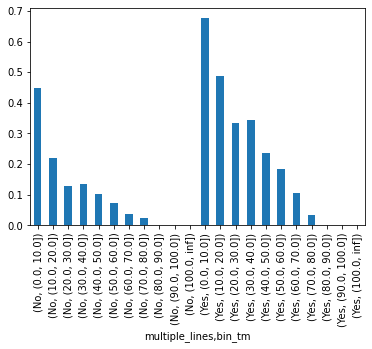

In [57]:
X_train.groupby(['multiple_lines', 'bin_tm']).churn_value.agg('mean').plot.bar()

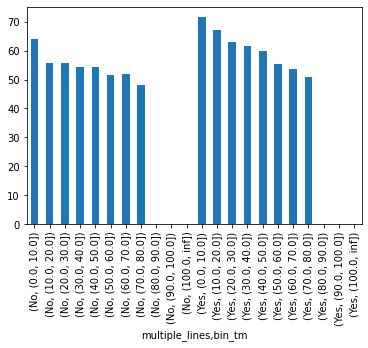

In [58]:
X_train.groupby(['multiple_lines', 'bin_tm']).churn_score.agg('mean').plot.bar()

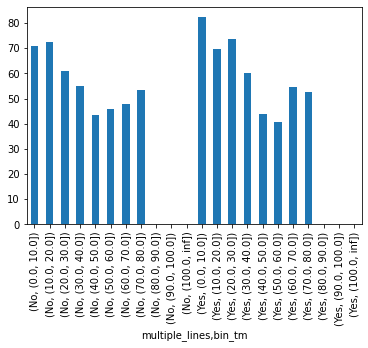

In [59]:
X_train.groupby(['multiple_lines', 'bin_tm']).churn_score.agg(mean_4_most_frequent).plot.bar()

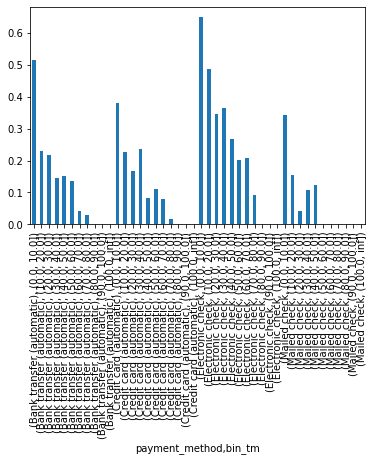

In [60]:
X_train.groupby(['payment_method', 'bin_tm']).churn_value.agg('mean').plot.bar()

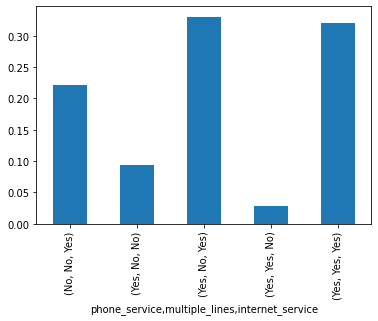

In [61]:
X_train.groupby(['phone_service', 'multiple_lines', 'internet_service']).churn_value.agg('mean').plot.bar()

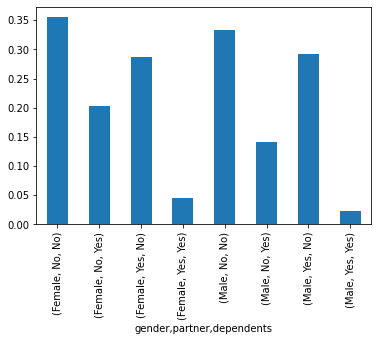

In [62]:
X_train.groupby(['gender', 'partner', 'dependents']).churn_value.agg('mean').plot.bar()

# Checking Churn Reason

In [63]:
X_train.groupby(['churn_reason', 'internet_service'])['internet_service'].agg('count').nlargest(6)

churn_reason                               internet_service
Attitude of support person                 Yes                 89
Competitor offered higher download speeds  Yes                 89
Don't know                                 Yes                 85
Competitor offered more data               Yes                 80
Attitude of service provider               Yes                 70
Competitor made better offer               Yes                 70
Name: internet_service, dtype: int64

In [64]:
X_train.groupby(['churn_reason', 'tech_support'])['tech_support'].agg('count').nlargest(6)

churn_reason                               tech_support
Attitude of support person                 No              86
Competitor offered higher download speeds  No              83
Don't know                                 No              74
Competitor made better offer               No              68
Competitor offered more data               No              68
Attitude of service provider               No              55
Name: tech_support, dtype: int64

In [65]:
X_train.groupby(['churn_reason', 'payment_method']).churn_reason.agg('count').nlargest(6)

churn_reason                               payment_method  
Competitor offered higher download speeds  Electronic check    55
Attitude of support person                 Electronic check    52
Competitor offered more data               Electronic check    50
Don't know                                 Electronic check    49
Competitor made better offer               Electronic check    46
Attitude of service provider               Electronic check    41
Name: churn_reason, dtype: int64

In [66]:
X_train.groupby(['churn_reason', 'bin_mc']).churn_reason.agg('count').nlargest(6)

churn_reason                               bin_mc       
Attitude of support person                 (75.0, 90.0]     30
Competitor offered more data               (90.0, 105.0]    30
Don't know                                 (90.0, 105.0]    26
Attitude of service provider               (90.0, 105.0]    25
Competitor made better offer               (75.0, 90.0]     24
Competitor offered higher download speeds  (90.0, 105.0]    24
Name: churn_reason, dtype: int64

In [67]:
X_train.groupby(['churn_reason', 'service_count'])['churn_reason'].agg('count').nlargest(10)

churn_reason                               service_count
Competitor offered higher download speeds  3                22
Attitude of support person                 2                20
                                           3                20
Competitor made better offer               3                20
Don't know                                 2                20
Competitor made better offer               5                19
Competitor offered more data               6                19
                                           4                18
                                           5                17
Don't know                                 5                17
Name: churn_reason, dtype: int64

In [68]:
X_train.groupby(['churn_reason', 'bin_tm']).churn_reason.agg('count').nlargest(10)

churn_reason                               bin_tm     
Attitude of support person                 (0.0, 10.0]    54
Don't know                                 (0.0, 10.0]    48
Competitor made better offer               (0.0, 10.0]    46
Competitor offered higher download speeds  (0.0, 10.0]    46
Competitor offered more data               (0.0, 10.0]    42
Attitude of service provider               (0.0, 10.0]    41
Network reliability                        (0.0, 10.0]    34
Competitor had better devices              (0.0, 10.0]    28
Price too high                             (0.0, 10.0]    27
Service dissatisfaction                    (0.0, 10.0]    24
Name: churn_reason, dtype: int64

In [69]:
X_train.groupby(['churn_reason', 'internet_service']).internet_service.agg('count').nlargest(6)

churn_reason                               internet_service
Attitude of support person                 Yes                 89
Competitor offered higher download speeds  Yes                 89
Don't know                                 Yes                 85
Competitor offered more data               Yes                 80
Attitude of service provider               Yes                 70
Competitor made better offer               Yes                 70
Name: internet_service, dtype: int64

# Training

In [70]:
from collections import defaultdict, namedtuple
from sklearn.metrics import roc_auc_score

def mean_4_most_common(x):
    return np.mean(x.value_counts().nlargest(4).index)


In [71]:
df = pd.read_csv('kaggle_train_churn.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')

df['internet_type'] = df['internet_service'].copy()
df['internet_service'] = df['internet_type'].apply(lambda x: 'Yes' if x != 'No' else 'No')


drop_cols = [
    'customerid',
    'count',
    'country', 
    'state',
    'city',
    'zip_code',
    'lat_long', 
    'latitude',
    'longitude',
    'cltv', 
    'churn_reason', 
]

y = df['churn_value'].copy()
X = df.drop(drop_cols, axis=1)

X_train, X_val, y_train_v, y_val_v = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [72]:
X_train.shape, X_val.shape

((3697, 21), (1585, 21))

In [73]:
before_encoding(X_train)
before_encoding(X_val)

In [74]:
X_train.head()

,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn_score,churn_value,internet_type,total_charges,service_count
2964,Male,No,No,No,26,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,62,0,Fiber optic,2564.9,6
3078,Male,No,Yes,No,72,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),85.15,76,0,DSL,6130.8,8
992,Female,No,No,No,67,Yes,Yes,No,No,No,No,No,No,No,Two year,Yes,Mailed check,26.10,42,0,No,1748.7,2
4994,Female,Yes,No,No,18,Yes,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),49.85,71,0,DSL,897.3,3
5105,Female,No,No,No,15,No,No,Yes,Yes,Yes,Yes,Yes,No,No,One year,No,Mailed check,45.90,51,0,DSL,688.5,5


In [75]:
Binner = namedtuple('Binner', ['col_name', 'bins'])

class NumericalBinner:
    
    def __init__(self, cols_to_bins):
        self.cols_to_bins = cols_to_bins
        self.bin_results = []
    
    def fit(self, X):
        return
    
    def transform(self, X):
        
        bin_list = []
        for col_name, bins in self.cols_to_bins:
            bin_name = 'bin_' + ''.join([c[0] for c in col_name.split('_')])
            bin_cut = pd.cut(X[col_name], bins).rename(bin_name)
            bin_list.append(bin_cut)
        
        
        return X.join(bin_list)

In [76]:
bin_tm = Binner('tenure_months', np.linspace(0, 100, 11).tolist() + [np.inf])
bin_mc = Binner('monthly_charges', np.linspace(0, 150, 11).tolist() + [np.inf])

cols_to_bins = [
    bin_tm,
    bin_mc
]

In [77]:
binner = NumericalBinner(cols_to_bins)

X_train = binner.transform(X_train)
X_val = binner.transform(X_val)

In [78]:
X_train.head()

,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn_score,churn_value,internet_type,total_charges,service_count,bin_tm,bin_mc
2964,Male,No,No,No,26,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,62,0,Fiber optic,2564.9,6,"(20.0, 30.0]","(90.0, 105.0]"
3078,Male,No,Yes,No,72,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),85.15,76,0,DSL,6130.8,8,"(70.0, 80.0]","(75.0, 90.0]"
992,Female,No,No,No,67,Yes,Yes,No,No,No,No,No,No,No,Two year,Yes,Mailed check,26.10,42,0,No,1748.7,2,"(60.0, 70.0]","(15.0, 30.0]"
4994,Female,Yes,No,No,18,Yes,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),49.85,71,0,DSL,897.3,3,"(10.0, 20.0]","(45.0, 60.0]"
5105,Female,No,No,No,15,No,No,Yes,Yes,Yes,Yes,Yes,No,No,One year,No,Mailed check,45.90,51,0,DSL,688.5,5,"(10.0, 20.0]","(45.0, 60.0]"


In [79]:
X_train.shape, X_val.shape

((3697, 25), (1585, 25))

In [80]:
Agg = namedtuple('Agg', ['list_cols', 'target', 'stat'])

# agg_list = list of tuple. One tuple a list of cols name, a target, a stat
class FeatureEncoder:
    def __init__(self, agg_list, col_name_prefix='v'):
        self.agg_list = agg_list
        self.agg_results = []
        self.col_name_prefix = col_name_prefix
        
    
    def fit(self, X):
        for i, (cols, target, stat) in enumerate(self.agg_list):
            
            agg_name = self.col_name_prefix + '_agg' + str(i+1) 
            aggregation = X.groupby(cols)[target].agg(stat)
            aggregation = aggregation.rename(agg_name)
            self.agg_results.append(aggregation)

    def transform(self, X):
        prev_cols = X.columns
        X = X.copy().reset_index()
        
        for aggregation in self.agg_results:
            X = X.merge(aggregation, on=aggregation.index.names, how='left')
        
        X = X.drop(labels=prev_cols, axis=1).apply(lambda x: x.fillna(x.mean()), axis=0)
        
        return X.set_index('index')

In [81]:
# churn_values
v_agg1 = Agg(['service_count'], 'churn_value', 'mean')
v_agg2 = Agg(['service_count', 'bin_tm'], 'churn_value', churn_rate)
v_agg3 = Agg(['service_count', 'bin_mc'], 'churn_value', churn_rate)
v_agg4 = Agg(['bin_tm'], 'churn_value', 'mean')
v_agg5 = Agg(['internet_service', 'bin_tm'], 'churn_value', 'mean')
v_agg6 = Agg(['phone_service', 'bin_tm'], 'churn_value', 'mean')
v_agg7 = Agg(['phone_service', 'bin_mc'], 'churn_value', churn_rate)
v_agg8 = Agg(['internet_type', 'bin_tm'], 'churn_value', 'mean')
v_agg9 = Agg(['internet_type', 'bin_mc'], 'churn_value', 'mean')
v_agg10 = Agg(['payment_method', 'contract'], 'churn_value', 'mean')
v_agg11 = Agg(['payment_method'], 'churn_value', 'mean')
v_agg12 = Agg(['contract'], 'churn_value', 'mean')
v_agg13 = Agg(['contract', 'paperless_billing'], 'churn_value', 'mean')
v_agg14 = Agg(['service_count', 'paperless_billing'], 'churn_value', 'mean')
v_agg15 = Agg(['service_count', 'contract'], 'churn_value', 'mean')
v_agg16 = Agg(['service_count', 'payment_method'], 'churn_value', 'mean')
v_agg17 = Agg(['service_count', 'contract',  'payment_method'], 'churn_value', churn_rate)
v_agg18 = Agg(['contract', 'payment_method', 'paperless_billing'], 'churn_value', 'mean')
v_agg19 = Agg(['contract', 'dependents'], 'churn_value', 'mean')
v_agg20 = Agg(['bin_mc'], 'churn_value', 'mean')
v_agg21 = Agg(['contract', 'bin_tm'], 'churn_value', 'mean')
v_agg22 = Agg(['senior_citizen', 'bin_tm'], 'churn_value', 'mean')
v_agg23 = Agg(['multiple_lines', 'bin_tm'], 'churn_value', 'mean')
v_agg24 = Agg(['payment_method', 'bin_tm'], 'churn_value', 'mean')
v_agg25 = Agg(['phone_service', 'multiple_lines', 'internet_service'], 'churn_value', 'mean')
v_agg26 = Agg(['gender', 'partner', 'dependents'], 'churn_value', 'mean')

values_agg_list = [
    v_agg1,
    v_agg2,
    v_agg3,
    v_agg4,
    v_agg5,
    v_agg6,
    v_agg7,
    v_agg8,
    v_agg9,
    v_agg10,
    v_agg11,
    v_agg12,
    v_agg13,
    v_agg14,
    v_agg15,
    v_agg16,
    v_agg17,
    v_agg18,
    v_agg19,
    v_agg20,
    v_agg21,
    v_agg22,
    v_agg23,
    v_agg24,
    v_agg25
]

In [82]:
# churn_scores

s_agg1 = Agg(['service_count'], 'churn_score', mean_4_most_common)
s_agg2 = Agg(['service_count', 'bin_tm'], 'churn_score', 'mean') #
s_agg3 = Agg(['service_count', 'bin_mc'], 'churn_score', 'mean') #
s_agg4 = Agg(['internet_service', 'bin_tm'], 'churn_score', 'mean')
s_agg5 = Agg(['phone_service', 'bin_tm'], 'churn_score', mean_4_most_common)
s_agg6 = Agg(['internet_type', 'bin_tm'], 'churn_score', 'mean')
s_agg7 = Agg(['internet_type', 'bin_mc'], 'churn_score', mean_4_most_common)
s_agg8 = Agg(['payment_method', 'contract'], 'churn_score', mean_4_most_common)
s_agg9 = Agg(['payment_method'], 'churn_score', mean_4_most_common)
s_agg10 = Agg(['contract'], 'churn_score', 'mean')
s_agg11 = Agg(['contract', 'paperless_billing'], 'churn_score', mean_4_most_common)
s_agg12 = Agg(['service_count', 'paperless_billing'], 'churn_score', mean_4_most_common)
s_agg13 = Agg(['service_count', 'contract'], 'churn_score', 'mean')
s_agg14 = Agg(['service_count', 'payment_method'], 'churn_score', mean_4_most_common)
s_agg15 = Agg(['contract', 'payment_method', 'paperless_billing'], 'churn_score', 'mean')
s_agg16 = Agg(['contract', 'dependents'], 'churn_score', mean_4_most_common)
s_agg17 = Agg(['contract', 'bin_tm'], 'churn_score', 'mean')
s_agg18 = Agg(['senior_citizen', 'bin_tm'], 'churn_score', 'mean')
s_agg19 = Agg(['multiple_lines', 'bin_tm'], 'churn_score', 'mean')
s_agg20 = Agg(['payment_method', 'bin_tm'], 'churn_score', 'mean')
s_agg21 = Agg(['phone_service', 'multiple_lines', 'internet_service'], 'churn_score', mean_4_most_common)


scores_agg_list = [
    s_agg1,
    s_agg2,
    s_agg3,
    s_agg4,
    s_agg5,
    s_agg6,
    s_agg7,
    s_agg8,
    s_agg9,
    s_agg10,
    s_agg11,
    s_agg12,
    s_agg13,
    s_agg14,
    s_agg15,
    s_agg16,
    s_agg17,
    s_agg18,
    s_agg19,
    s_agg20,
    s_agg21
]

In [83]:
v_encoder = FeatureEncoder(values_agg_list)
v_encoder.fit(X_train)

X_train_v_enc = v_encoder.transform(X_train)
X_train_v_enc.head()

,v_agg1,v_agg2,v_agg3,v_agg4,v_agg5,v_agg6,v_agg7,v_agg8,v_agg9,v_agg10,v_agg11,v_agg12,v_agg13,v_agg14,v_agg15,v_agg16,v_agg17,v_agg18,v_agg19,v_agg20,v_agg21,v_agg22,v_agg23,v_agg24,v_agg25
index,,,,,,,,,,,,,,,,,,,,,,,,,
2964,0.247917,17.0,104.0,0.241645,0.294671,0.250000,222.0,0.436047,0.365894,0.523859,0.436393,0.423746,0.478810,0.305810,0.458874,0.380952,68.0,0.558743,0.473341,0.350711,0.349020,0.197492,0.147186,0.393103,0.327601
3078,0.111111,1.0,5.0,0.028571,0.036364,0.023346,251.0,0.028846,0.056701,0.024221,0.168927,0.025054,0.042959,0.125000,0.036036,0.076923,2.0,0.042553,0.040070,0.367496,0.023529,0.025751,0.030457,0.028037,0.313755
992,0.309211,0.0,12.0,0.081319,0.012195,0.087167,64.0,0.012195,0.078240,0.004739,0.199531,0.025054,0.042959,0.421488,0.014815,0.255814,1.0,0.016667,0.040070,0.101810,0.030534,0.068878,0.111498,0.018182,0.027778
4994,0.433014,28.0,46.0,0.315335,0.404762,0.320755,98.0,0.241611,0.255102,0.315789,0.138889,0.423746,0.478810,0.467857,0.476965,0.327586,18.0,0.344086,0.473341,0.255102,0.407080,0.557143,0.244373,0.240964,0.327601
5105,0.300420,30.0,10.0,0.315335,0.404762,0.256410,27.0,0.241611,0.255102,0.081871,0.199531,0.108355,0.060172,0.191781,0.132075,0.205882,6.0,0.055046,0.141397,0.255102,0.096386,0.272265,0.244373,0.161290,0.247978


In [84]:
X_val_v_enc = v_encoder.transform(X_val)
X_val_v_enc.head()

,v_agg1,v_agg2,v_agg3,v_agg4,v_agg5,v_agg6,v_agg7,v_agg8,v_agg9,v_agg10,v_agg11,v_agg12,v_agg13,v_agg14,v_agg15,v_agg16,v_agg17,v_agg18,v_agg19,v_agg20,v_agg21,v_agg22,v_agg23,v_agg24,v_agg25
index,,,,,,,,,,,,,,,,,,,,,,,,,
1305,0.114706,67.0,78.0,0.479691,0.199203,0.474758,64.0,0.199203,0.078240,0.329787,0.199531,0.423746,0.312874,0.085954,0.247525,0.137143,47.0,0.263158,0.166154,0.101810,0.512500,0.441648,0.434676,0.341270,0.092476
3237,0.114706,9.0,78.0,0.315335,0.404762,0.256410,26.0,0.241611,0.393939,0.329787,0.199531,0.423746,0.312874,0.085954,0.247525,0.137143,47.0,0.263158,0.473341,0.101810,0.407080,0.272265,0.244373,0.161290,0.247978
4682,0.114706,9.0,78.0,0.315335,0.078740,0.320755,64.0,0.078740,0.078240,0.329787,0.199531,0.423746,0.478810,0.182266,0.247525,0.137143,47.0,0.403587,0.473341,0.101810,0.407080,0.272265,0.244373,0.161290,0.092476
2976,0.215116,15.0,5.0,0.081319,0.096515,0.087167,251.0,0.023529,0.056701,0.021277,0.138889,0.025054,0.042959,0.252033,0.052632,0.163043,2.0,0.025000,0.040070,0.367496,0.030534,0.068878,0.111498,0.077419,0.313755
2991,0.114706,0.0,78.0,0.224924,0.012987,0.227891,64.0,0.012987,0.078240,0.024221,0.168927,0.025054,0.010020,0.085954,0.000000,0.062500,0.0,0.006757,0.040070,0.101810,0.037037,0.194757,0.153005,0.152778,0.092476


In [85]:
X_train_v_enc.shape, X_val_v_enc.shape

((3697, 25), (1585, 25))

In [86]:
s_encoder = FeatureEncoder(scores_agg_list, 's')
s_encoder.fit(X_train)

X_train_s_enc = s_encoder.transform(X_train)
X_train_s_enc.head()

,s_agg1,s_agg2,s_agg3,s_agg4,s_agg5,s_agg6,s_agg7,s_agg8,s_agg9,s_agg10,s_agg11,s_agg12,s_agg13,s_agg14,s_agg15,s_agg16,s_agg17,s_agg18,s_agg19,s_agg20,s_agg21
index,,,,,,,,,,,,,,,,,,,,,
2964,63.50,63.727273,62.400000,60.112853,67.75,64.784884,76.00,70.75,70.00,63.622454,68.25,65.00,64.246753,73.50,68.631148,70.75,61.549020,57.623824,56.134199,64.179310,73.75
3078,57.50,47.418182,54.620253,49.890909,40.00,49.615385,68.25,46.50,58.25,50.599129,66.00,60.00,51.378378,44.50,52.978723,64.25,49.125490,48.442060,50.324873,51.102804,72.50
992,69.25,49.878049,52.985294,49.073171,51.50,49.073171,47.50,40.25,48.25,50.599129,66.00,76.75,52.629630,70.25,50.100000,64.25,50.980916,52.780612,53.940767,48.181818,54.00
4994,78.25,63.920000,59.709220,62.827381,69.75,55.778523,59.75,66.50,70.25,63.622454,68.25,76.75,66.024390,67.75,59.704301,70.75,62.669617,67.542857,57.118971,57.240964,73.75
5105,72.25,65.200000,53.562500,62.827381,54.50,55.778523,59.75,45.50,48.25,54.305483,56.25,63.50,53.801887,47.00,52.504587,66.75,54.000000,58.402036,57.118971,53.862903,55.25


In [87]:
X_val_s_enc = s_encoder.transform(X_val)
X_val_s_enc.head()

,s_agg1,s_agg2,s_agg3,s_agg4,s_agg5,s_agg6,s_agg7,s_agg8,s_agg9,s_agg10,s_agg11,s_agg12,s_agg13,s_agg14,s_agg15,s_agg16,s_agg17,s_agg18,s_agg19,s_agg20,s_agg21
index,,,,,,,,,,,,,,,,,,,,,
1305,49.5,57.105263,52.947059,55.195219,72.25,55.195219,47.50,55.25,48.25,63.622454,71.50,57.0,57.528053,49.5,60.202429,63.25,66.241667,63.834096,63.272283,61.288360,47.50
3237,49.5,50.911504,52.947059,62.827381,54.50,55.778523,70.50,55.25,48.25,63.622454,71.50,57.0,57.528053,49.5,60.202429,70.75,62.669617,58.402036,57.118971,53.862903,55.25
4682,49.5,50.911504,52.947059,51.732283,69.75,51.732283,47.50,55.25,48.25,63.622454,68.25,59.0,57.528053,49.5,62.582960,70.75,62.669617,58.402036,57.118971,53.862903,47.50
2976,61.5,55.173913,54.577465,53.453083,51.50,52.505882,68.25,48.25,70.25,50.599129,66.00,61.5,51.007519,66.5,51.800000,64.25,50.980916,52.780612,53.940767,54.070968,72.50
2991,49.5,48.033333,52.947059,49.337662,65.00,49.337662,47.50,46.50,58.25,50.599129,46.00,57.0,47.631336,47.0,47.824324,64.25,52.000000,56.404494,54.459016,56.416667,47.50


In [88]:
X_train_s_enc.shape, X_val_s_enc.shape

((3697, 21), (1585, 21))

In [89]:
import lightgbm as lgb

In [90]:
def cross_val_train_lgb(X_train, y_train, X_val, y_val):
    train_data = lgb.Dataset(X_train, label=y_train.ravel())
    val_data = lgb.Dataset(X_val, label=y_val.ravel())
    
    num_round = np.arange(95, 110, 1)
    leaves = [3,4,5,6,7,8,9,10,11,12,13]
    param = {'objective': 'binary'}
    param['metric'] = 'roc-auc'

    best_model = None
    best_auc = 0
    best_params = {'leav': 0, 'num_rounds': 0}
    for round in num_round:
        for leav in leaves:
            param['num_leaves'] = leav 
            bst = lgb.train(param, train_data, round, valid_sets=[val_data])
            ypred = bst.predict(X_val)
            if best_auc < roc_auc_score(y_val, ypred):
                best_auc = roc_auc_score(y_val, ypred)
                best_model = bst
                best_params['leav'] = leav
                best_params['num_rounds'] = round
            print("train_roc_auc = ", best_auc, best_params)
        
    return best_auc, best_model

In [91]:
best_auc, best_model = cross_val_train_lgb(X_train_v_enc, y_train_v, X_val_v_enc, y_val_v)

train_roc_auc =  0.8576051679329512 {'leav': 3, 'num_rounds': 95}
train_roc_auc =  0.8595315369087736 {'leav': 4, 'num_rounds': 95}
train_roc_auc =  0.8599387789784337 {'leav': 5, 'num_rounds': 95}
train_roc_auc =  0.8604942032770033 {'leav': 6, 'num_rounds': 95}
train_roc_auc =  0.8604942032770033 {'leav': 6, 'num_rounds': 95}
train_roc_auc =  0.8604942032770033 {'leav': 6, 'num_rounds': 95}
train_roc_auc =  0.8604942032770033 {'leav': 6, 'num_rounds': 95}
train_roc_auc =  0.8604942032770033 {'leav': 6, 'num_rounds': 95}
train_roc_auc =  0.8604942032770033 {'leav': 6, 'num_rounds': 95}
train_roc_auc =  0.8604942032770033 {'leav': 6, 'num_rounds': 95}
train_roc_auc =  0.8604942032770033 {'leav': 6, 'num_rounds': 95}
train_roc_auc =  0.8604942032770033 {'leav': 6, 'num_rounds': 95}
train_roc_auc =  0.8604942032770033 {'leav': 6, 'num_rounds': 95}
train_roc_auc =  0.8604942032770033 {'leav': 6, 'num_rounds': 95}
train_roc_auc =  0.8607760603837402 {'leav': 6, 'num_rounds': 96}
train_roc_

In [92]:
best_auc

0.8607760603837402

In [93]:
def lbl_encode_data(data): #train, val and test data
  data = data.copy()
  #gender
  data.loc[data['gender'] == 'Male', 'gender'] = 1
  data.loc[data['gender'] == 'Female', 'gender'] = 0

  columns_for_fix_with_2_unique = ['internet_service', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'paperless_billing']
  for column in columns_for_fix_with_2_unique:
    data.loc[data[column] == 'Yes', column] = 1
    data.loc[data[column] == 'No', column] = 0

  columns_for_fix_with_3_unique = ['online_security', 'online_backup', 'device_protection', 'tech_support',
                                   'streaming_tv', 'streaming_movies']
  for column in columns_for_fix_with_3_unique:
    data.loc[data[column] == 'Yes', column] = 1
    data.loc[data[column] == 'No internet service', column] = 0
    data.loc[data[column] == 'No', column] = -1

  # Multiple Lines
  data.loc[data['multiple_lines'] == 'Yes', 'multiple_lines'] = 1
  data.loc[data['multiple_lines'] == 'No phone service', 'multiple_lines'] = 0
  data.loc[data['multiple_lines'] == 'No', 'multiple_lines'] = -1

  # Internet Service 
  data.loc[data['internet_type'] == 'Fiber optic', 'internet_type'] = 1
  data.loc[data['internet_type'] == 'No', 'internet_type'] = 0
  data.loc[data['internet_type'] == 'DSL', 'internet_type'] = -1

  # Contract ['Two year' 'Month-to-month' 'One year']
  data.loc[data['contract'] == 'Two year', 'contract'] = 1
  data.loc[data['contract'] == 'One year', 'contract'] = 0
  data.loc[data['contract'] == 'Month-to-month', 'contract'] = -1
  
  # Payment Method ['Bank transfer (automatic)' 'Electronic check' 'Mailed check' 'Credit card (automatic)']
  data.loc[data['payment_method'] == 'Bank transfer (automatic)', 'payment_method'] = 0
  data.loc[data['payment_method'] == 'Electronic check', 'payment_method'] = 1
  data.loc[data['payment_method'] == 'Mailed check', 'payment_method'] = 2
  data.loc[data['payment_method'] == 'Credit card (automatic)', 'payment_method'] = 3


  for col in data.columns:
    data[col] = data[col].astype(float)

  return data

In [94]:
X_train_clean = X_train.drop(['churn_score', 'churn_value', 'bin_tm', 'bin_mc', 'total_charges'], axis=1)
X_val_clean = X_val.drop(['churn_score', 'churn_value', 'bin_tm', 'bin_mc', 'total_charges'], axis=1)
X_train_lbl_enc = lbl_encode_data(X_train_clean)
X_val_lbl_enc = lbl_encode_data(X_val_clean)

In [95]:
X_train_lbl_enc.shape, X_val_lbl_enc.shape

((3697, 20), (1585, 20))

In [96]:
best_auc, best_model = cross_val_train_lgb(X_train_lbl_enc, y_train_v, X_val_lbl_enc, y_val_v)

train_roc_auc =  0.8668546404871155 {'leav': 3, 'num_rounds': 95}
train_roc_auc =  0.867385195040973 {'leav': 4, 'num_rounds': 95}
train_roc_auc =  0.8678919160894812 {'leav': 5, 'num_rounds': 95}
train_roc_auc =  0.8678919160894812 {'leav': 5, 'num_rounds': 95}
train_roc_auc =  0.8678919160894812 {'leav': 5, 'num_rounds': 95}
train_roc_auc =  0.8678919160894812 {'leav': 5, 'num_rounds': 95}
train_roc_auc =  0.8678919160894812 {'leav': 5, 'num_rounds': 95}
train_roc_auc =  0.8678919160894812 {'leav': 5, 'num_rounds': 95}
train_roc_auc =  0.8678919160894812 {'leav': 5, 'num_rounds': 95}
train_roc_auc =  0.8678919160894812 {'leav': 5, 'num_rounds': 95}
train_roc_auc =  0.8678919160894812 {'leav': 5, 'num_rounds': 95}
train_roc_auc =  0.8678919160894812 {'leav': 5, 'num_rounds': 95}
train_roc_auc =  0.8678919160894812 {'leav': 5, 'num_rounds': 95}
train_roc_auc =  0.8678919160894812 {'leav': 5, 'num_rounds': 95}
train_roc_auc =  0.8678919160894812 {'leav': 5, 'num_rounds': 95}
train_roc_a

In [97]:
best_auc

0.8678919160894812

# Try concatenation of `lbl_encoding` and `v_encoding`

In [98]:
X_train_join1_enc = X_train_lbl_enc.join([X_train_v_enc, X_train_s_enc])
X_val_join1_enc = X_val_lbl_enc.join([X_val_v_enc, X_val_s_enc])

In [99]:
best_auc, best_model = cross_val_train_lgb(X_train_join1_enc, y_train_v, X_val_join1_enc, y_val_v)

train_roc_auc =  0.8662567303746627 {'leav': 3, 'num_rounds': 95}
train_roc_auc =  0.8683406077336616 {'leav': 4, 'num_rounds': 95}
train_roc_auc =  0.8683406077336616 {'leav': 4, 'num_rounds': 95}
train_roc_auc =  0.8683406077336616 {'leav': 4, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_

In [100]:
best_auc

0.8689032857077723

# Try concatenation of `lbl_enconding` and `(v_enconding, s_encoding)`

In [101]:
X_train_join1_enc = X_train_lbl_enc.join([X_train_v_enc, X_train_s_enc])
X_val_join1_enc = X_val_lbl_enc.join([X_val_v_enc, X_val_s_enc])

In [102]:
best_auc, best_model = cross_val_train_lgb(X_train_join1_enc, y_train_v, X_val_join1_enc, y_val_v)

train_roc_auc =  0.8662567303746627 {'leav': 3, 'num_rounds': 95}
train_roc_auc =  0.8683406077336616 {'leav': 4, 'num_rounds': 95}
train_roc_auc =  0.8683406077336616 {'leav': 4, 'num_rounds': 95}
train_roc_auc =  0.8683406077336616 {'leav': 4, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_auc =  0.8688152053619169 {'leav': 7, 'num_rounds': 95}
train_roc_

In [103]:
best_auc

0.8689032857077723

# Try test set

In [104]:
df_test = pd.read_csv('kaggle_test_churn.csv')
df_test.columns = df_test.columns.str.lower().str.replace(' ', '_')

df_test['internet_type'] = df_test['internet_service'].copy()
df_test['internet_service'] = df_test['internet_type'].apply(lambda x: 'Yes' if x != 'No' else 'No')

drop_cols_test = [
    'customerid',
    'count',
    'country', 
    'state',
    'city',
    'zip_code',
    'lat_long', 
    'latitude',
    'longitude',
]


X_test = df_test.drop(drop_cols_test, axis=1)
before_encoding(X_test)
X_test_lbl_enc = lbl_encode_data(X_test)
X_test = binner.transform(X_test)
X_test_v_enc = v_encoder.transform(X_test)
X_test_s_enc = s_encoder.transform(X_test)

In [105]:
probs = best_model.predict(X_test_lbl_enc.join([X_test_v_enc, X_test_s_enc]))
df_probs = pd.DataFrame({'Predicted': probs})
df_probs.index = df_probs.index.rename('Id')

In [106]:
df_probs.head()

,Predicted
Id,
0,0.123061
1,0.439800
2,0.051232
3,0.379209
4,0.090156


In [107]:
#df_probs.to_csv('submission_12_12_n12.csv')

In [108]:
pip install shap

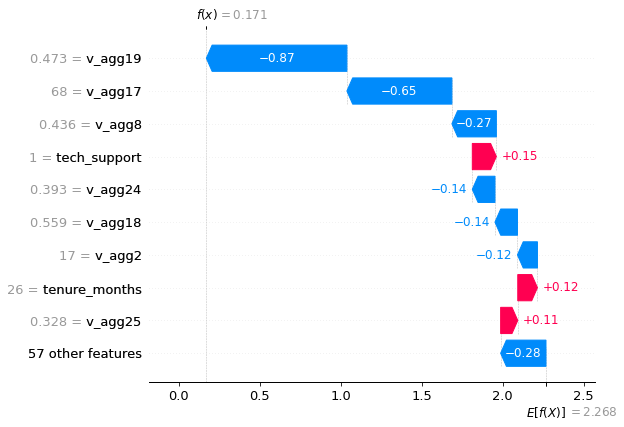

In [109]:
import shap

explainer = shap.Explainer(best_model)
shap_values = explainer(X_train_join1_enc)

shap.plots.waterfall(shap_values[0][:,0])

	Плюсы нашей модели:
1) Сделали визуализацию и проанализировали ее
2) Сделали кросс-валидацию => т.е. наша модель хорошо обобщает все данные, что есть в обучении
3) Сделали фичер-импортенс => есть информация на какие признаки стоит обратить внимание
4) Обучали множество моделей и выбрали лучшую исходя из метрики ROC-AUC
6) новые фичи
5) В команде всего 2 человека => траты на разработку модели от нашей команды меньше чем для 3ех людей

	Минусы
1) Мб обрезать какие-то значения в различных признаках (сделать нормализацию (ящик с усами))
2) Неустойчивость к новым значениям признаков, т.е. если появится, например 3-ий гендер, то наша модель не сможет его просчитать (по моему решению, у напарника мб получится)